In [16]:
import csv
import emoji
from nltk.tokenize import TweetTokenizer
import numpy as np
import pandas as pd
import re
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import time

print(emoji.demojize("😘"))
print(emoji.demojize("😍"))
print(emoji.demojize("👍"))
print(emoji.demojize("🙂"))
print(emoji.demojize("😂"))
print(emoji.demojize("😻"))

:face_blowing_a_kiss:
:smiling_face_with_heart-eyes:
:thumbs_up:
:slightly_smiling_face:
:face_with_tears_of_joy:
:smiling_cat_face_with_heart-eyes:


In [5]:
TRAIN_FILE = 'data/train.txt'
DEV_FILE = 'data/dev.txt'
TEST_FILE = 'data/test.txt'

TURNS_NAMES = ["turn1", "turn2", "turn3"]
LABEL = ["label"]
CONCATENATED_TURNS = "turns"

In [6]:
def parse_file(file_path):
    output_dict = dict()
    with open(file_path, newline='\n', encoding='utf8') as csvfile:
        return pd.read_csv(csvfile, sep="\t")

In [7]:
train_data = parse_file(TRAIN_FILE)
dev_data = parse_file(DEV_FILE)
test_data = parse_file(TEST_FILE)

In [29]:
df = [
train_data.loc[train_data['label'] == 'happy'].iloc[[1,4]],
train_data.loc[train_data['label'] == 'sad'].head(2),
train_data.loc[train_data['label'] == 'angry'].iloc[[2,3]],
train_data.loc[train_data['label'] == 'others'].iloc[[5,6]],
]
pd.concat(df)

,id,turn1,turn2,turn3,label
21,21,Do you dance?,Yes I love to dance 😻,😂😂😂 so you have legs too,happy
39,39,yes :),Now happy? :)),haha yes ofcorse ;),happy
13,13,Bad,Bad bad! That's the bad kind of bad.,I have no gf,sad
16,16,My gf left ne,Get over it. Go out with someone else.,Me*,sad
10,10,I hate my boyfriend,you got a boyfriend?,Yes,angry
17,17,get lost,I know you guys want to loose to me always.,I don't want to talk u any more,angry
7,7,Ok,ok im back!!,"So, how are u",others
8,8,Really?,really really really really really,Y saying so many times...i can hear you,others


In [10]:
print(train_data.shape)
print(dev_data.shape)
print(test_data.shape)

(30160, 5)
(2755, 5)
(5509, 5)


In [31]:
pd.Series(train_data['label'].value_counts())

others    4677
angry      298
happy      284
sad        250
Name: label, dtype: int64

In [32]:
pd.Series(dev_data['label'].value_counts())

others    2338
angry      150
happy      142
sad        125
Name: label, dtype: int64

In [33]:
pd.Series(test_data['label'].value_counts())

others    4677
angry      298
happy      284
sad        250
Name: label, dtype: int64

others    14948
angry      5506
sad        5463
happy      4243
Name: label, dtype: int64


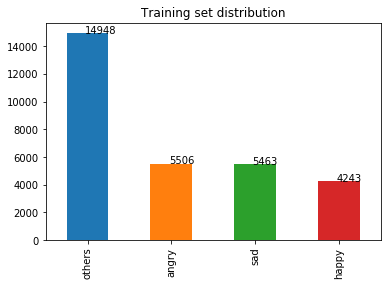

In [54]:
df=train_data['label'].value_counts()
print(df)
ax=df.plot(kind='bar', title="Training set distribution")
x_offset = -0.03
y_offset = 0.02
vals = list(df)
for i,p in enumerate(ax.patches):
    b = p.get_bbox()
    val = vals[i]
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

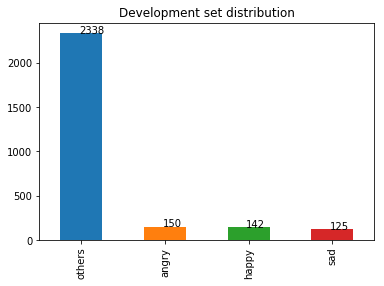

In [56]:
df=dev_data['label'].value_counts()
ax=df.plot(kind='bar', title="Development set distribution")
x_offset = -0.03
y_offset = 0.02
vals = list(df)
for i,p in enumerate(ax.patches):
    b = p.get_bbox()
    val = vals[i]
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

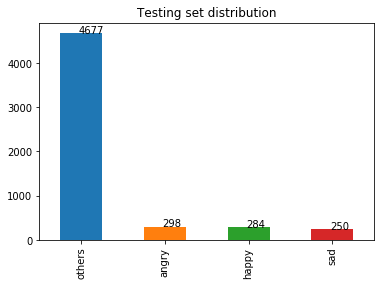

In [57]:
df=test_data['label'].value_counts()
ax=df.plot(kind='bar', title="Testing set distribution")
x_offset = -0.03
y_offset = 0.02
vals = list(df)
for i,p in enumerate(ax.patches):
    b = p.get_bbox()
    val = vals[i]
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset))

In [9]:
labels = {0: 'angry',
          1: 'happy',
          2: 'others',
          3: 'sad'}
tp =[200,174,3155,169]
fp =[694+35+11,454+20,62+40+87,374+22+12]
fn =[62+22+14,87+11+12,694+374+454,40+35+6]
prec = sum(tp)/sum(tp+fp)
rec = sum(tp)/sum(tp+fn)
print("F1 all")
print(2*prec*rec/(prec+rec)) 
print("***")
for i in range(4):
    print("F1 %s: " % labels[i])
    prec = tp[i]/(tp[i]+fp[i])
    rec = tp[i]/(tp[i]+fn[i])
    print(2*prec*rec/(prec+rec))
    print("****")
tp.pop(2)
fp.pop(2)
fn.pop(2)
print("F1 happy angry sad")
prec = sum(tp)/sum(tp+fp)
rec = sum(tp)/sum(tp+fn)
f1= 2*prec*rec/(prec+rec)
print(f1)

F1 all
0.6712652023960791
***
F1 angry: 
0.32310177705977383
****
F1 happy: 
0.3733905579399142
****
F1 others: 
0.7866849520009974
****
F1 sad: 
0.40870616686819833
****
F1 happy angry sad
0.36236236236236236


In [8]:
#SVM
labels = {0: 'angry',
          1: 'happy',
          2: 'others',
          3: 'sad'}
tp =[226,170,4089,188]
fp =[193+12+9,231+5+4,56+46+100,164+11+5]#vertical
fn =[11+5+56,100+9+5,193+164+231,12+4+46]
prec = sum(tp)/sum(tp+fp)
rec = sum(tp)/sum(tp+fn)
print("F1 all")
print(2*prec*rec/(prec+rec)) 
print("***")
for i in range(4):
    print("F1 %s: " % labels[i])
    prec = tp[i]/(tp[i]+fp[i])
    rec = tp[i]/(tp[i]+fn[i])
    print(2*prec*rec/(prec+rec))
    print("****")
tp.pop(2)
fp.pop(2)
fn.pop(2)
print("F1 happy angry sad")
prec = sum(tp)/sum(tp+fp)
rec = sum(tp)/sum(tp+fn)
f1= 2*prec*rec/(prec+rec)
print(f1)

F1 all
0.8482483209293883
***
F1 angry: 
0.6124661246612467
****
F1 happy: 
0.4899135446685879
****
F1 others: 
0.9119090098126673
****
F1 sad: 
0.6084142394822007
****
F1 happy angry sad
0.5697560975609757


In [10]:
#SVM
labels = {0: 'angry',
          1: 'happy',
          2: 'others',
          3: 'sad'}
tp =[135,123,3264,118]
fp =[470+23+24,484+17+13,118+96+119,459+28+18]#vertical
fn =[118+28+17,119+24+18, 470+459+484,96+23+13]
prec = sum(tp)/sum(tp+fp)
rec = sum(tp)/sum(tp+fn)
print("F1 all")
print(2*prec*rec/(prec+rec)) 
print("***")
for i in range(4):
    print("F1 %s: " % labels[i])
    prec = tp[i]/(tp[i]+fp[i])
    rec = tp[i]/(tp[i]+fn[i])
    print(2*prec*rec/(prec+rec))
    print("****")
tp.pop(2)
fp.pop(2)
fn.pop(2)
print("F1 happy angry sad")
prec = sum(tp)/sum(tp+fp)
rec = sum(tp)/sum(tp+fn)
f1= 2*prec*rec/(prec+rec)
print(f1)

F1 all
0.6607369758576874
***
F1 angry: 
0.28421052631578947
****
F1 happy: 
0.267100977198697
****
F1 others: 
0.788977519941987
****
F1 sad: 
0.27033218785796104
****
F1 happy angry sad
0.27405247813411077
